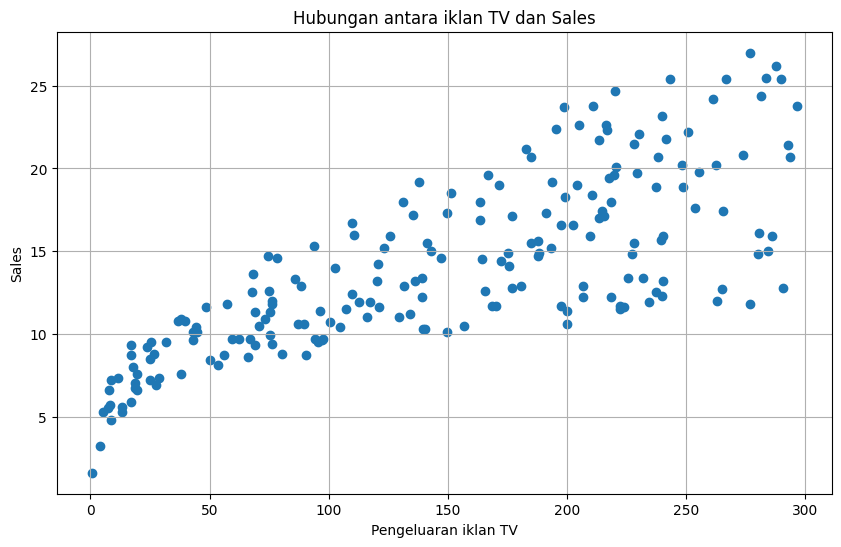

R-squared: 0.899438024100912


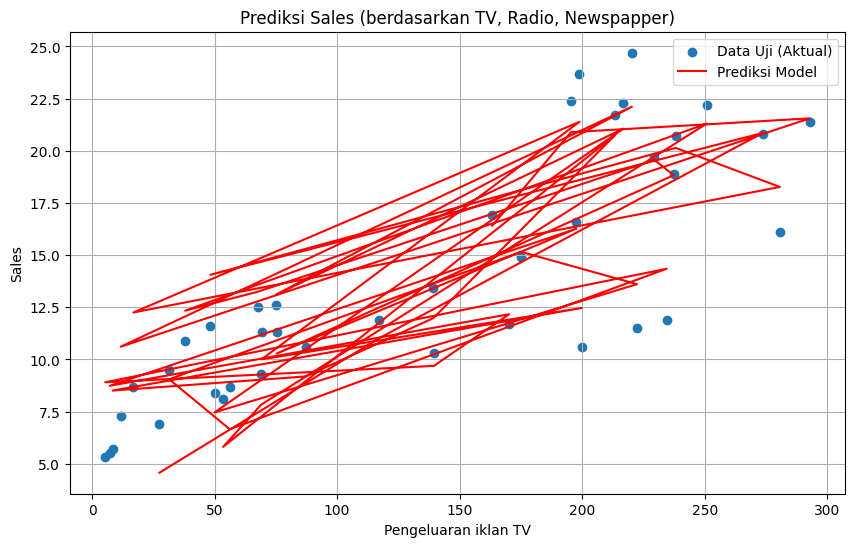


--- Input Data untuk Prediksi Baru ---


Masukkan Pengeluaran TV       :  100.3
Masukkan Pengeluaran Radio    :  23.7
Masukkan Pengeluaran Newspaper:  15.4


Prediksi Sales: 11.99


C:\Users\HP ELITEBOOK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data dari file CSV
df = pd.read_csv("Advertising.csv")

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('Pengeluaran iklan TV')
plt.ylabel('Sales')
plt.title('Hubungan antara iklan TV dan Sales')
plt.grid(True)
plt.show()

# Bagi data menjadi data latih dan data uji
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi penjualan pada data uji
y_pred = model.predict(X_test)

# Evaluasi model (contoh: menggunakan R-squared)
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(X_test['TV'], y_test, label='Data Uji (Aktual)')
plt.plot(X_test['TV'], y_pred, color='red', label='Prediksi Model')
plt.xlabel('Pengeluaran iklan TV')
plt.ylabel('Sales')
plt.title('Prediksi Sales (berdasarkan TV, Radio, Newspapper)')
plt.legend()
plt.grid(True)
plt.show()

# fitur input manual untuk prediksi baru
print("\n--- Input Data untuk Prediksi Baru ---")
try:
    tv = float(input("Masukkan Pengeluaran TV       : "))
    radio = float(input("Masukkan Pengeluaran Radio    : "))
    newspaper = float(input("Masukkan Pengeluaran Newspaper: "))

    # Masukkan input baru ke dalam format yang sesuai
    new_advertising_spend = [[tv, radio, newspaper]]
    
    # prediksi penjualan berdasarkan input baru
    predicted_sales = model.predict(new_advertising_spend)
    print(f"Prediksi Sales: {predicted_sales[0]:.2f}")
    
except ValueError:
    print("Error: Harap masukkan angka yang valid (contoh: 200 atau 50.5)")